### first we import the dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

###### Machhine Learning
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#### Data visualization####
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\hp\Downloads\sales dataset model\advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


- data preprocessing
- EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [5]:
# some statistical information about our dataframe
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# EDA

- identify and treatment of outlier 

<Axes: >

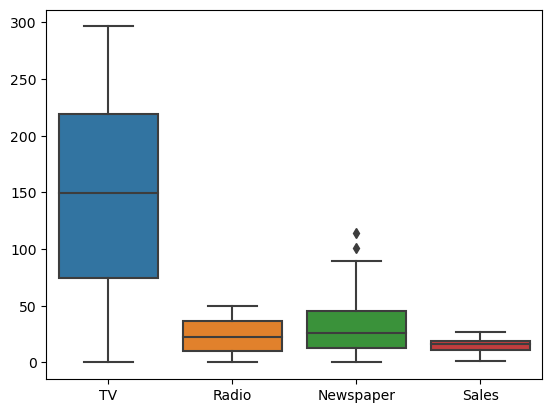

In [6]:
import seaborn as sns
sns.boxplot(data=df)

# Treatment of outlier using = winsorizing Technique

In [7]:
q1 = df['Newspaper'].quantile(0.25)
q3 = df['Newspaper'].quantile(0.75)
iqr = q3-q1 #Interquantile range

upper_limit = q3+1.5*iqr #Acceptable Range
upper_limit

93.625

In [8]:
df['Newspaper']= np.where(df['Newspaper'] > upper_limit,upper_limit,df['Newspaper']) #upper limit

<Axes: >

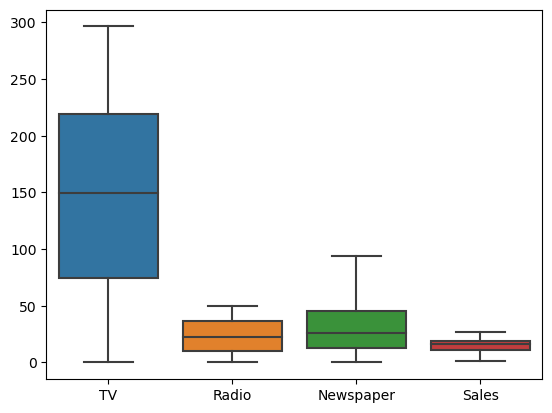

In [9]:
sns.boxplot(data=df)

# missing value

In [10]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# Data Partition 
- splitting the data traning and test data
-  using sklear we split 70% of data into traning and rest in test set

In [11]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [12]:
# putting feature variable to x
X = df.drop('Sales', axis= 1)

## putting response variable to y 
y = df[['Sales']]

##random state is the seed used by the random number generator.it can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3, random_state=100)

In [13]:
df = pd.concat([y_train, X_train], axis=1)
df.head()

,Sales,TV,Radio,Newspaper
74,17.0,213.4,24.6,13.1
3,16.5,151.5,41.3,58.5
185,22.6,205.0,45.1,19.6
26,15.0,142.9,29.3,12.6
90,14.0,134.3,4.9,9.3


# correlation metrix

<Axes: xlabel='TV', ylabel='Sales'>

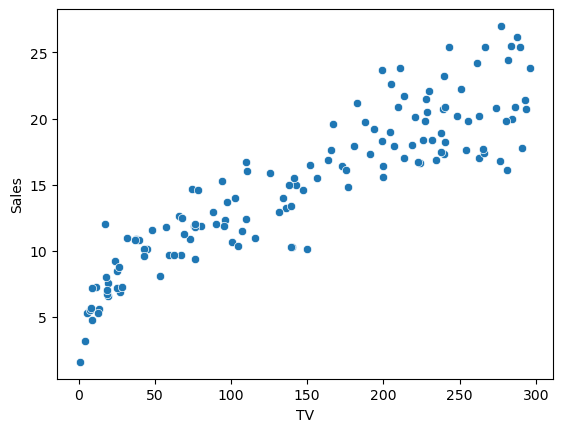

In [14]:
sns.scatterplot(x='TV',y='Sales',data=df)

In [15]:
df.corr()

,Sales,TV,Radio,Newspaper
Sales,1.000000,0.903213,0.334486,0.246495
TV,0.903213,1.000000,0.030733,0.113017
Radio,0.334486,0.030733,1.000000,0.403137
Newspaper,0.246495,0.113017,0.403137,1.000000


<Axes: >

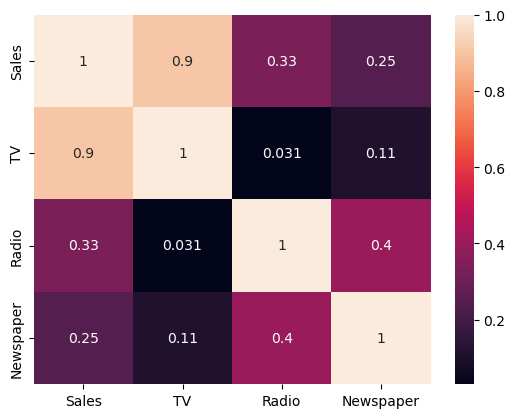

In [16]:
sns.heatmap(df.corr(), annot=True)

##### TV hvae 91% strong positive  
- TV have high impact on Sales
- there is no colinearity in data, so every platform is indepedant

##### multicolinearity with the help of VIF


In [17]:
X1=df.drop(['Sales'],axis=1)
VIF = pd.Series([variance_inflation_factor(X1.values, i)
                            for i in range(X1.shape[1])],
                           index=X1.columns)
VIF

TV           2.363428
Radio        3.245656
Newspaper    3.358319
dtype: float64

- No colinearity in data ,indicate no multi-colinearity

# Model Building using linear regression

In [18]:
from sklearn.linear_model import LinearRegression
Ireg= LinearRegression()
model3 = Ireg.fit(X_train, y_train)

In [19]:
np.round(model3.intercept_,4)

array([4.3288])

In [20]:
np.round(model3.coef_,4)

array([[0.0538, 0.1099, 0.0067]])

In [21]:
model3.feature_names_in_

array(['TV', 'Radio', 'Newspaper'], dtype=object)

In [22]:
np.round(model3.score(X_train,y_train),3)

0.911

# Assumptions of model
- Linearity
- Normality
- homoscedasicity
- model error has to be independently identicaly Distibuted 

In [23]:
df.head()

,Sales,TV,Radio,Newspaper
74,17.0,213.4,24.6,13.1
3,16.5,151.5,41.3,58.5
185,22.6,205.0,45.1,19.6
26,15.0,142.9,29.3,12.6
90,14.0,134.3,4.9,9.3


In [24]:
# Y = intercept + b1 * tv + b2 * radio + b3 * newspaper
Y = 4.4342 + 0.0558 * 241.7 + 0.1059 * 38 + 0.0018 * 23.2
Y

21.98702

In [25]:
df.head()

,Sales,TV,Radio,Newspaper
74,17.0,213.4,24.6,13.1
3,16.5,151.5,41.3,58.5
185,22.6,205.0,45.1,19.6
26,15.0,142.9,29.3,12.6
90,14.0,134.3,4.9,9.3


In [26]:
df['Predicted'] = np.round(model3.predict(X_train),1)
df['Residual'] = np.round(df.Sales - df.Predicted,1)
df.head()

,Sales,TV,Radio,Newspaper,Predicted,Residual
74,17.0,213.4,24.6,13.1,18.6,-1.6
3,16.5,151.5,41.3,58.5,17.4,-0.9
185,22.6,205.0,45.1,19.6,20.4,2.2
26,15.0,142.9,29.3,12.6,15.3,-0.3
90,14.0,134.3,4.9,9.3,12.2,1.8


# Linearity

<Axes: title={'center': 'Sales vs TV'}, xlabel='TV', ylabel='Sales'>

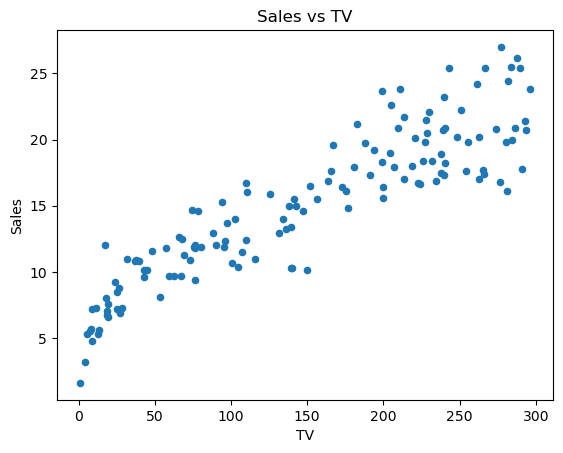

In [27]:
df.plot.scatter(x ='TV', y='Sales', title='Sales vs TV')

# Homoscedasicity

<Axes: xlabel='Predicted', ylabel='Residual'>

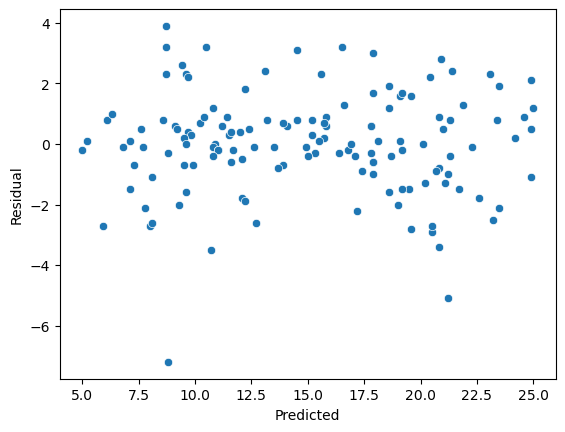

In [28]:
sns.scatterplot(x = 'Predicted', y = 'Residual', data=df)

# Normality

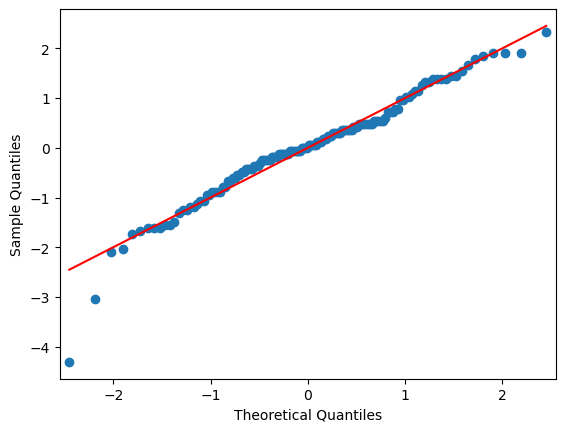

In [29]:
import statsmodels.api as sm
fig = sm.qqplot(df['Residual'], fit=True, line='s') # s indicated standardized line 
plt.show()

# Model error are IID

<Axes: ylabel='Frequency'>

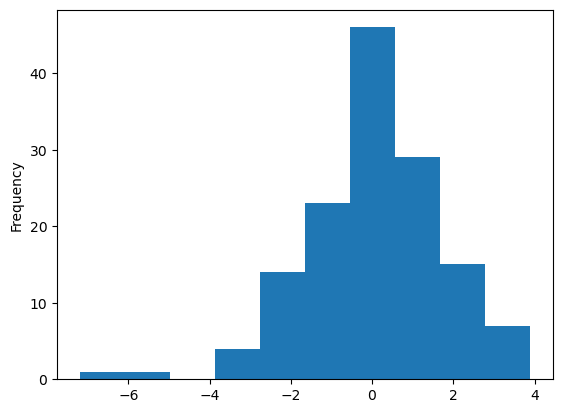

In [30]:
df['Residual'].plot.hist()

# Prediction on test (unseen data)

In [31]:
df_test = pd.concat([X_test,y_test],axis=1)

df_test.head()

,TV,Radio,Newspaper,Sales
126,7.8,38.9,50.6,6.6
104,238.2,34.3,5.3,20.7
99,135.2,41.7,45.9,17.2
92,217.7,33.5,59.0,19.4
111,241.7,38.0,23.2,21.8


In [32]:
df_test['Prediction'] = np.round(model3.predict(X_test),1) #predict = all row Prediction (auto)
df_test.head()

,TV,Radio,Newspaper,Sales,Prediction
126,7.8,38.9,50.6,6.6,9.4
104,238.2,34.3,5.3,20.7,21.0
99,135.2,41.7,45.9,17.2,16.5
92,217.7,33.5,59.0,19.4,20.1
111,241.7,38.0,23.2,21.8,21.7


# Train 

In [27]:
from sklearn.metrics import r2_score
r2= r2_score(df.Sales, df.Predicted)
print('R2 score for model performance on train :',np.round(r2,2))

AttributeError: 'DataFrame' object has no attribute 'Predicted'

# Test

In [34]:
from sklearn.metrics import r2_score
r2= r2_score(df_test.Sales, df_test.Prediction)
print('R2 score for model performance on test :',np.round(r2,2))

R2 score for model performance on test : 0.86


#### Model is good fit on train dataset and performance on test is also good

# Loss / Cost / Error function -RMSE

In [35]:
from sklearn.metrics import mean_squared_error

model_mse = mean_squared_error(df['Sales'], df['Predicted'])
model_rmse = np.sqrt(model_mse)
print("Train RMSE: {:.3}".format(model_rmse))

Train RMSE: 1.67


In [36]:
from sklearn.metrics import mean_squared_error

model_mse = mean_squared_error(df_test['Sales'], df_test['Prediction'])
model_rmse = np.sqrt(model_mse)
print("Test RMSE: {:.3}".format(model_rmse))

Test RMSE: 1.63


# Finished

# In a Task i am applying another algorithms below
- decision tree 
- 1)Train
- 2)Test

In [46]:
# Train dataset

In [11]:
# putting feature variable to x
X = df.drop('Sales', axis= 1)

## putting response variable to y 
y = df[['Sales']]

##random state is the seed used by the random number generator.it can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, = train_test_split(X,y, train_size=0.7,test_size=0.3, random_state=100)

In [12]:
params = {'max_depth':[2,3,4],
          'min_samples_split':[100,150,200],
          'min_samples_leaf':[50,75,115]}

In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
gridcv = GridSearchCV(DecisionTreeRegressor(),
                      params,
                      verbose = 1,
                      cv = 10)
gridcv.fit(X_train,y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 3, 4],
                         'min_samples_leaf': [50, 75, 115],
                         'min_samples_split': [100, 150, 200]},
             verbose=1)

In [14]:
gridcv.best_estimator_

DecisionTreeRegressor(max_depth=3, min_samples_leaf=50, min_samples_split=100)

In [15]:
from sklearn.tree import DecisionTreeRegressor
ModelDT = DecisionTreeRegressor(**gridcv.best_params_)

In [16]:
ModelDT.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=50, min_samples_split=100)

In [17]:
train_de = pd.concat([y_train,X_train], axis=1)
train_de.head()

,Sales,TV,Radio,Newspaper
74,17.0,213.4,24.6,13.1
3,16.5,151.5,41.3,58.5
185,22.6,205.0,45.1,19.6
26,15.0,142.9,29.3,12.6
90,14.0,134.3,4.9,9.3


In [18]:
train_de['Predicted'] = ModelDT.predict(X_train)
train_de.head()

,Sales,TV,Radio,Newspaper,Predicted
74,17.0,213.4,24.6,13.1,19.779412
3,16.5,151.5,41.3,58.5,19.779412
185,22.6,205.0,45.1,19.6,19.779412
26,15.0,142.9,29.3,12.6,10.497222
90,14.0,134.3,4.9,9.3,10.497222


In [19]:
from sklearn.metrics import r2_score
r2= r2_score(train_de.Sales, train_de.Predicted)
print('R2 score for model performance on train :',np.round(r2,2))

R2 score for model performance on train : 0.69


In [22]:
from sklearn.metrics import mean_squared_error

model_mse = mean_squared_error(train_de['Sales'], train_de['Predicted'])
model_rmse = np.sqrt(model_mse)
print("Train RMSE: {:.3}".format(model_rmse))

Train RMSE: 3.12


In [47]:
# Test dataset

In [20]:
test_de = pd.concat([X_test, y_test], axis=1)
test_de.head()

,TV,Radio,Newspaper,Sales
126,7.8,38.9,50.6,6.6
104,238.2,34.3,5.3,20.7
99,135.2,41.7,45.9,17.2
92,217.7,33.5,59.0,19.4
111,241.7,38.0,23.2,21.8


In [23]:
test_de['Prediction'] = ModelDT.predict(X_test)
test_de.head()

,TV,Radio,Newspaper,Sales,Prediction
126,7.8,38.9,50.6,6.6,10.497222
104,238.2,34.3,5.3,20.7,19.779412
99,135.2,41.7,45.9,17.2,10.497222
92,217.7,33.5,59.0,19.4,19.779412
111,241.7,38.0,23.2,21.8,19.779412


In [24]:
from sklearn.metrics import r2_score
r2= r2_score(test_de.Sales, test_de.Prediction)
print('R2 score for model performance on test :',np.round(r2,2))

R2 score for model performance on test : 0.62


In [26]:
from sklearn.metrics import mean_squared_error

model_mse = mean_squared_error(test_de['Sales'], test_de['Prediction'])
model_rmse = np.sqrt(model_mse)
print("test RMSE: {:.3}".format(model_rmse))

test RMSE: 2.74
